In [4]:
import pandas as pd
from io import StringIO
import requests

url = "https://catalog.ourworldindata.org/garden/covid/latest/compact/compact.csv"
resp = requests.get(url)
df = pd.read_csv(StringIO(resp.text))

df.head()


country        date  total_cases  new_cases  new_cases_smoothed  \
0  Afghanistan  2020-01-01          NaN        NaN                 NaN   
1  Afghanistan  2020-01-02          NaN        NaN                 NaN   
2  Afghanistan  2020-01-03          NaN        NaN                 NaN   
3  Afghanistan  2020-01-04          0.0        0.0                 NaN   
4  Afghanistan  2020-01-05          0.0        0.0                 NaN   

   total_cases_per_million  new_cases_per_million  \
0                      NaN                    NaN   
1                      NaN                    NaN   
2                      NaN                    NaN   
3                      0.0                    0.0   
4                      0.0                    0.0   

   new_cases_smoothed_per_million  total_deaths  new_deaths  ...  population  \
0                             NaN           NaN         NaN  ...  40578801.0   
1                             NaN           NaN         NaN  ...  40578801.0   
2                             NaN           NaN         NaN  ...  40578801.0   
3                             NaN           0.0         0.0  ...  40578801.0   
4                             NaN           0.0         0.0  ...  40578801.0   

   population_density  median_age  life_expectancy  gdp_per_capita  \
0           62.215477   16.752001        65.616997     1516.273315   
1           62.215477   16.752001        65.616997     1516.273315   
2           62.215477   16.752001        65.616997     1516.273315   
3           62.215477   16.752001        65.616997     1516.273315   
4           62.215477   16.752001        65.616997     1516.273315   

   extreme_poverty  diabetes_prevalence  handwashing_facilities  \
0              NaN                 10.9               48.214695   
1              NaN                 10.9               48.214695   
2              NaN                 10.9               48.214695   
3              NaN                 10.9               48.214695   
4              NaN                 10.9               48.214695   

   hospital_beds_per_thousand  human_development_index  
0                        0.39                      NaN  
1                        0.39                      NaN  
2                        0.39                      NaN  
3                        0.39                      NaN  
4                        0.39                      NaN  

[5 rows x 61 columns]

In [6]:
india = df[df["country"] == "India"].copy()

In [7]:
india = india[["date", "total_cases", "total_deaths", "new_cases", "new_deaths"]]

In [8]:
india["date"] = pd.to_datetime(india["date"])

In [9]:
india.tail()

date  total_cases  total_deaths  new_cases  new_deaths
209942 2025-07-16   45055652.0      533821.0       30.0         2.0
209943 2025-07-17   45055674.0      533821.0       22.0         0.0
209944 2025-07-18   45055686.0      533823.0       12.0         2.0
209945 2025-07-19   45055703.0      533824.0       17.0         1.0
209946 2025-07-20   45055713.0      533825.0       10.0         1.0

In [10]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

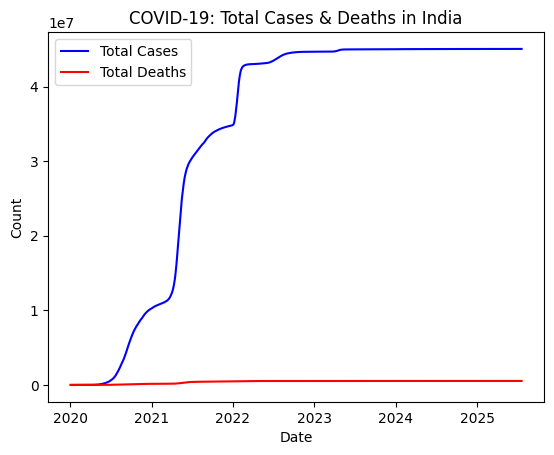

In [11]:
plt.plot(india["date"], india["total_cases"], label="Total Cases", color="blue")
plt.plot(india["date"], india["total_deaths"], label="Total Deaths", color="red")
plt.xlabel("Date")
plt.ylabel("Count")
plt.title("COVID-19: Total Cases & Deaths in India")
plt.legend()
plt.show()

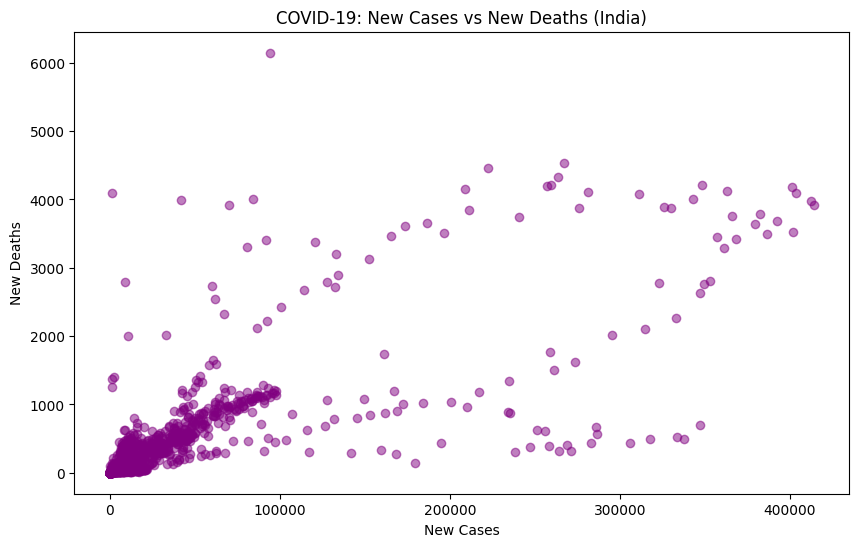

In [12]:
plt.figure(figsize=(10,6))
plt.scatter(india["new_cases"], india["new_deaths"], alpha=0.5, color="purple")
plt.xlabel("New Cases")
plt.ylabel("New Deaths")
plt.title("COVID-19: New Cases vs New Deaths (India)")
plt.show()